## Домашнее задание "Введение и классификация рекомендательных систем"

Постройте топ фильмов в категориях Action и Comedy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [10]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [111]:
joined_ratings = ratings.join(movies.set_index('movieId'), on='movieId')

In [112]:
joined_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## Исследуем жанр Comedy

In [113]:
joined_ratings = joined_ratings[joined_ratings.genres.str.contains('Comedy')]

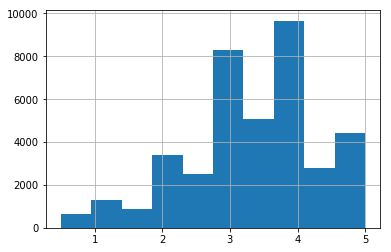

In [114]:
joined_ratings.rating.hist()

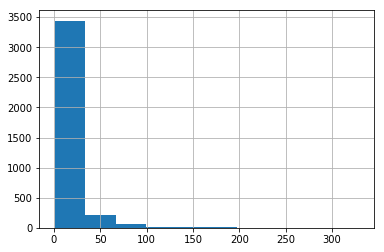

In [115]:
joined_ratings.groupby('title').rating.count().hist()

In [116]:
def create_top(data):
    title_num_ratings = {}
    
    for title, group in tqdm_notebook(data.groupby('title')):
        title_num_ratings[title] = group.userId.unique().shape[0]
        
    min_num_ratings = np.min([title_num_ratings[f] for f in title_num_ratings.keys()])
    max_num_ratings = np.max([title_num_ratings[f] for f in title_num_ratings.keys()])
    mean_num_ratings = np.mean([title_num_ratings[f] for f in title_num_ratings.keys()])
    median_num_ratings = np.median([title_num_ratings[f] for f in title_num_ratings.keys()])
    
    # считаем средний рейтинг на каждый фильм
    title_mean_rating = {}

    for title, group in tqdm_notebook(data.groupby('title')):
        title_mean_rating[title] = group.rating.mean()
        
    film_with_our_mark = []

    # посчитаем нашу метрику для каждого фильма из датасета
    for f in title_num_ratings.keys():
        film_with_our_mark.append((f, title_mean_rating[f] * (title_num_ratings[f] - mean_num_ratings) / 
                                   (max_num_ratings - min_num_ratings),
                                   np.unique(joined_ratings.genres[joined_ratings.title==f].values)[0]))
    top_20 = list(sorted(film_with_our_mark, key=lambda x: x[1], reverse=True))[:20]
    
    return top_20   
    

In [117]:
top_20 = create_top(joined_ratings)

Построим топ и посмотрим какие тэги кроме Comedy присутсвуют в топ-20

In [118]:
for title in top_20:
    print(title[0],title[1],title[2])

Forrest Gump (1994) 4.044690189004988 Comedy|Drama|Romance|War
Pulp Fiction (1994) 3.7951694744027207 Comedy|Crime|Drama|Thriller
Toy Story (1995) 2.44570036838738 Adventure|Animation|Children|Comedy|Fantasy
Fargo (1996) 2.1407290948667828 Comedy|Crime|Drama|Thriller
Aladdin (1992) 1.995512278386442 Adventure|Animation|Children|Comedy|Musical
Back to the Future (1985) 1.9770460366271827 Adventure|Comedy|Sci-Fi
Shrek (2001) 1.8818424052365759 Adventure|Animation|Children|Comedy|Fantasy|Romance
True Lies (1994) 1.7868906474508017 Action|Adventure|Comedy|Romance|Thriller
Princess Bride, The (1987) 1.6980119019541347 Action|Adventure|Comedy|Fantasy|Romance
Men in Black (a.k.a. MIB) (1997) 1.6438934662291962 Action|Comedy|Sci-Fi
Pirates of the Caribbean: The Curse of the Black Pearl (2003) 1.5965607778868676 Action|Adventure|Comedy|Fantasy
Groundhog Day (1993) 1.5943567717320903 Comedy|Fantasy|Romance
Monty Python and the Holy Grail (1975) 1.5935458525419635 Adventure|Comedy|Fantasy
Finding

Если мы хотим рекомендовать спиcок комедий, попробуем удалить все фильмы, которые также относятся к драме и пересчитать рейтинг:

In [119]:
joined_ratings = joined_ratings[~joined_ratings.genres.str.contains('Drama')]

In [121]:
top_20 = create_top(joined_ratings)
for title in top_20:
    print(title[0],title[1],title[2])


Toy Story (1995) 3.7430968681284567 Adventure|Animation|Children|Comedy|Fantasy
Aladdin (1992) 3.0532677842314175 Adventure|Animation|Children|Comedy|Musical
Back to the Future (1985) 3.024622719015207 Adventure|Comedy|Sci-Fi
Shrek (2001) 2.878940077567065 Adventure|Animation|Children|Comedy|Fantasy|Romance
True Lies (1994) 2.733921772487838 Action|Adventure|Comedy|Romance|Thriller
Princess Bride, The (1987) 2.5966738848362585 Action|Adventure|Comedy|Fantasy|Romance
Men in Black (a.k.a. MIB) (1997) 2.5147614742039317 Action|Comedy|Sci-Fi
Pirates of the Caribbean: The Curse of the Black Pearl (2003) 2.4418099475734003 Action|Adventure|Comedy|Fantasy
Groundhog Day (1993) 2.438201622168181 Comedy|Fantasy|Romance
Monty Python and the Holy Grail (1975) 2.4366559286737606 Adventure|Comedy|Fantasy
Finding Nemo (2003) 2.411653368748986 Adventure|Animation|Children|Comedy
Monsters, Inc. (2001) 2.194182286127633 Adventure|Animation|Children|Comedy|Fantasy
Mask, The (1994) 2.177124430996364 Acti